In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
s = pd.read_csv('/content/covid_19_data.csv',)
s.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
corona_df = pd.read_csv('/content/covid_19_data.csv', parse_dates=['Last Update'])

In [ ]:
type(corona_df)

pandas.core.frame.DataFrame

In [ ]:
# Earliest Cases
corona_df.head() 

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [ ]:
corona_df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
15126,15127,04/14/2020,Wyoming,US,2020-04-14 23:41:11,282.0,1.0,0.0
15127,15128,04/14/2020,Xinjiang,Mainland China,2020-04-14 23:41:11,76.0,3.0,73.0
15128,15129,04/14/2020,Yukon,Canada,2020-04-14 23:41:11,8.0,0.0,0.0
15129,15130,04/14/2020,Yunnan,Mainland China,2020-04-14 23:41:11,184.0,2.0,175.0
15130,15131,04/14/2020,Zhejiang,Mainland China,2020-04-14 23:41:11,1267.0,1.0,1242.0


In [ ]:
corona_df.describe()  # data summary 

,SNo,Confirmed,Deaths,Recovered
count,15131.000000,15131.000000,15131.000000,15131.000000
mean,7566.000000,2061.836759,108.210165,502.725530
std,4368.087797,11189.202681,913.498994,4117.613616
min,1.000000,0.000000,0.000000,0.000000
25%,3783.500000,6.000000,0.000000,0.000000
50%,7566.000000,72.000000,1.000000,1.000000
75%,11348.500000,481.000000,5.000000,37.000000
max,15131.000000,203020.000000,21067.000000,68200.000000


In [ ]:
# Renaming ObservationDate to Date and Country/Region to Country.
corona_df.rename(columns={'ObservationDate': 'Date',
                          'Country/Region': 'Country'}, inplace=True)

In [ ]:
# Before making the model, all the independent variables should be in the numerical format except date.
corona_df.dtypes

SNo                        int64
Date                      object
Province/State            object
Country                   object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [ ]:
corona_df.shape #size of dataset

(15131, 8)

In [ ]:
corona_df.isnull()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
15126,False,False,False,False,False,False,False,False
15127,False,False,False,False,False,False,False,False
15128,False,False,False,False,False,False,False,False
15129,False,False,False,False,False,False,False,False


In [ ]:
# Only Province column has the null values so we replace them.
corona_df.isnull().sum().to_frame('nulls')
corona_df["Province/State"].fillna("NA", inplace=True)

In [ ]:
# Let's get the total Confirmed, Deaths and Recovered cases in the world(till 04/14).

# Here, I have done groupby date and country.
corona_df = corona_df.groupby(["Date", "Country"])[
    ['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
corona_sorted_df = corona_df.sort_values('Date', ascending=False)
corona_sorted_df = corona_sorted_df.drop_duplicates('Country')

# Now, I have all the unique date in the date column with country.
corona_sorted_df.head(80)

,Date,Country,Confirmed,Deaths,Recovered
8108,04/14/2020,Zimbabwe,17.0,3.0,0.0
7980,04/14/2020,Finland,3161.0,64.0,300.0
7989,04/14/2020,Guatemala,167.0,5.0,19.0
7988,04/14/2020,Grenada,14.0,0.0,0.0
7987,04/14/2020,Greece,2170.0,101.0,269.0
...,...,...,...,...,...
7963,04/14/2020,Cuba,766.0,21.0,132.0
7962,04/14/2020,Croatia,1704.0,31.0,415.0
7961,04/14/2020,Costa Rica,618.0,3.0,66.0
7960,04/14/2020,Congo (Kinshasa),241.0,20.0,20.0


In [ ]:
corona_confirmed_total_df = corona_sorted_df['Confirmed'].sum()
corona_deaths_total_df = corona_sorted_df['Deaths'].sum()
corona_recovered_total_df = corona_sorted_df['Recovered'].sum()

In [ ]:
corona_dict = {'Total Confirmed cases  in the world': corona_confirmed_total_df,
               'Total Deaths cases in the world': corona_deaths_total_df, 'Total Recovered cases in the world': corona_recovered_total_df}
corona_dict = pd.DataFrame.from_dict(
    corona_dict, orient='index', columns=['Total'])

corona_dict.style.background_gradient(cmap='Blues')

,Total
Total Confirmed cases in the world,1977127.000000
Total Deaths cases in the world,125994.000000
Total Recovered cases in the world,474835.000000


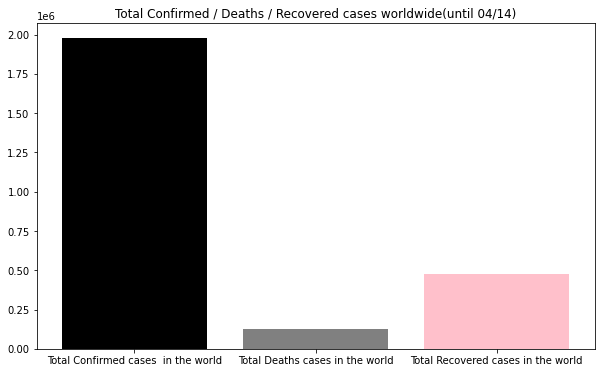

In [ ]:
# Graph illustrates Total cases in the world.
corona_dict = corona_dict.head(3)
x = corona_dict.index
y = corona_dict['Total'].values

plt.rcParams['figure.figsize'] = (10, 6)
plt.bar(x, y, color=['black', 'grey', 'pink'])
plt.title('Total Confirmed / Deaths / Recovered cases worldwide(until 04/14)')
plt.show()

In [ ]:
# Let's have a look at difference in the number of the corona cases between 04/14 and 04/13
corona_diff_df = corona_df.groupby(["Date", "Country"])[
    ['Date', 'Country', 'Confirmed']].sum().reset_index()
corona_confirmed_sorted_df = corona_diff_df.sort_values(
    'Country', ascending=False)

In [ ]:
corona_13_df = corona_confirmed_sorted_df[corona_confirmed_sorted_df.Date ==
                                          '04/13/2020'].reset_index().drop('index', axis=1)
corona_14_df = corona_confirmed_sorted_df[corona_confirmed_sorted_df.Date ==
                                          '04/14/2020'].reset_index().drop('index', axis=1)

corona_diff = pd.merge(corona_14_df, corona_13_df, on='Country')
corona_diff['cases_difference_13_14'] = corona_diff['Confirmed_x'] - corona_diff['Confirmed_y']
corona_diff.sort_values('cases_difference_13_14', ascending=False).head(60).style.background_gradient(cmap='Reds')

,Date_x,Country,Confirmed_x,Date_y,Confirmed_y,cases_difference_13_14
12,04/14/2020,US,607670.000000,04/13/2020,580619.000000,27051.000000
13,04/14/2020,UK,94845.000000,04/13/2020,89570.000000,5275.000000
14,04/14/2020,Turkey,65111.000000,04/13/2020,61049.000000,4062.000000
103,04/14/2020,Italy,162488.000000,04/13/2020,159516.000000,2972.000000
47,04/14/2020,Russia,21102.000000,04/13/2020,18328.000000,2774.000000
28,04/14/2020,Spain,172541.000000,04/13/2020,170099.000000,2442.000000
163,04/14/2020,Brazil,25262.000000,04/13/2020,23430.000000,1832.000000
107,04/14/2020,Iran,74877.000000,04/13/2020,73303.000000,1574.000000
154,04/14/2020,Canada,27035.000000,04/13/2020,25680.000000,1355.000000
123,04/14/2020,Germany,131359.000000,04/13/2020,130072.000000,1287.000000


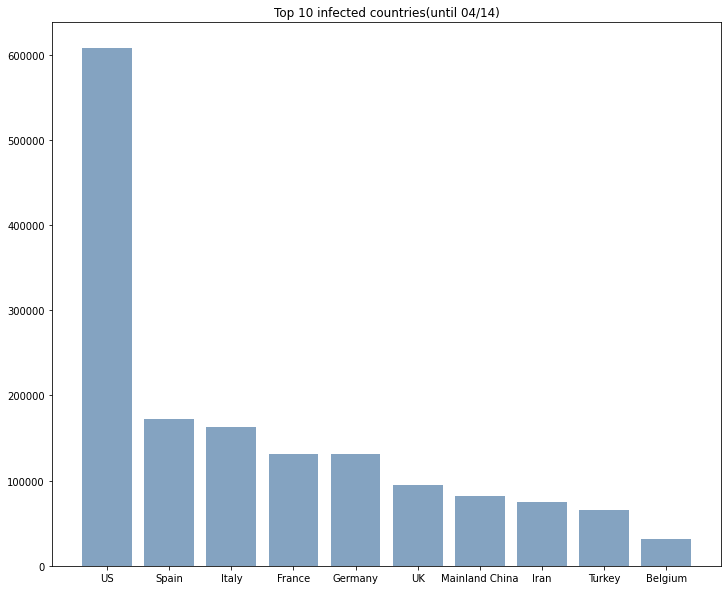

In [ ]:
# Top 10  infected Countries
sorted_By_Confirmed1 = corona_sorted_df.sort_values(
    'Confirmed', ascending=False)
sorted_By_Confirmed1 = sorted_By_Confirmed1.head(10)
x = sorted_By_Confirmed1.Country
y = sorted_By_Confirmed1.Confirmed
plt.rcParams['figure.figsize'] = (12, 10)
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.title('Top 10 infected countries(until 04/14)')
plt.show()

In [ ]:
corona_cases_per_day = corona_df.groupby(
    ["Date"])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
sorted_By_Confirmed1 = corona_cases_per_day.sort_values(
    'Date', ascending=False)

sorted_By_Confirmed1.style.background_gradient(cmap='Reds')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Date,Confirmed,Deaths,Recovered
83,04/14/2020,1976192.000000,125985.000000,474261.000000
82,04/13/2020,1917320.000000,119483.000000,448655.000000
81,04/12/2020,1846680.000000,114090.000000,421722.000000
80,04/11/2020,1771514.000000,108503.000000,402110.000000
79,04/10/2020,1691719.000000,102525.000000,376096.000000
78,04/09/2020,1595350.000000,95455.000000,353975.000000
77,04/08/2020,1511104.000000,88338.000000,328661.000000
76,04/07/2020,1426096.000000,81865.000000,300054.000000
75,04/06/2020,1345101.000000,74565.000000,276515.000000
74,04/05/2020,1272115.000000,69374.000000,260012.000000


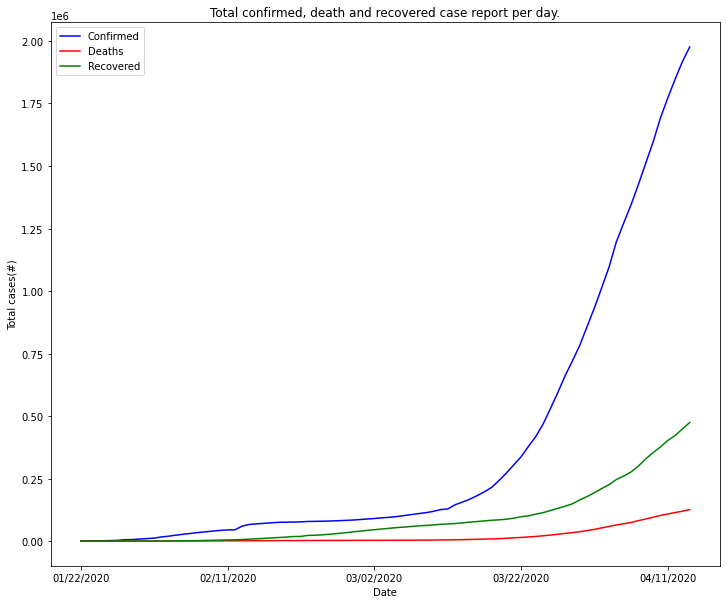

In [ ]:
# Line graph that illustrates increasing infections cases per day.
x = corona_cases_per_day.Date
y = corona_cases_per_day.Confirmed
y1 = corona_cases_per_day.Deaths
y2 = corona_cases_per_day.Recovered
ax = plt.gca()
corona_cases_per_day.plot(kind='line', x='Date',
                          y='Confirmed', color='blue', ax=ax)
corona_cases_per_day.plot(kind='line', x='Date',
          y='Deaths', color='red', ax=ax)
corona_cases_per_day.plot(kind='line', x='Date',
                          y='Recovered', color='green', ax=ax)

plt.ylabel('Total cases(#)')
plt.title('Total confirmed, death and recovered case report per day.')
plt.show()

In [ ]:
# Now, Let's prepare the data for the prediction.
# I am converting Date column of dataset to numeric for ensuring the independent variable should be on the same scale as other.
# In the date, I assume the start date as 0 (first day) when the COVID-19 had started and increasing by 1 over increament in date.
# Splitting corona data into Date and confirmed cases.
corona_index_df = pd.DataFrame(corona_cases_per_day.index)
corona_confirmed_df = pd.DataFrame(corona_cases_per_day.Confirmed)
corona_recovered_df = pd.DataFrame(corona_cases_per_day.Recovered)
corona_death_df = pd.DataFrame(corona_cases_per_day.Deaths)

In [ ]:

x_days_train = corona_index_df[0:78]
x_days_validate = corona_index_df[78:82]
x_days_test = corona_index_df[82:84]

y_confirmed_train = corona_confirmed_df[0:78]
y_confirmed_validate = corona_confirmed_df[78:82]
y_confirmed_test = corona_confirmed_df[82:84]


In [ ]:
# Let's apply Linear regression model on the dataset. As I can see, all the data are continuous, I think that Linear regression will be perfect.
# Linear regression
ln_model = LinearRegression()
ln_model.fit(x_days_train, y_confirmed_train)
y_pred = pd.DataFrame(ln_model.predict(x_days_train))
# print(type(y_pred))
# print(type(x_days_train[0]))
# x_days_train[0]

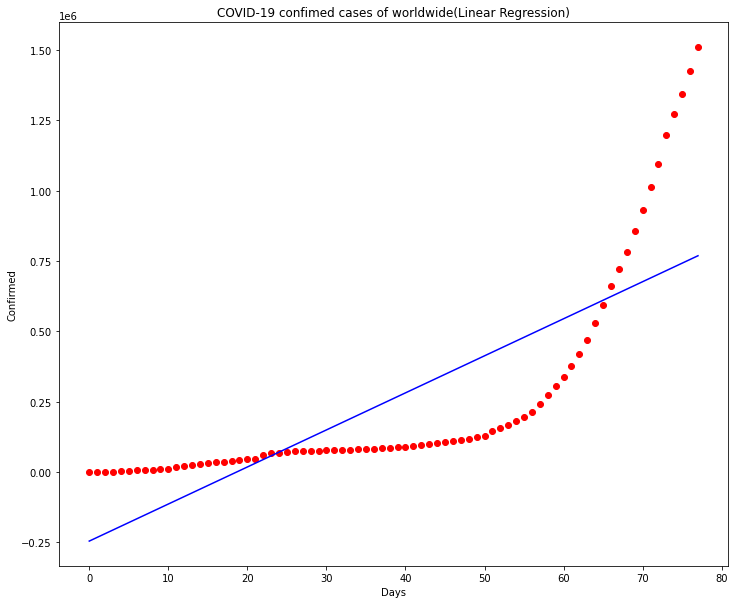

In [ ]:
plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train[0], ln_model.predict(x_days_train), color='blue')
plt.title('COVID-19 confimed cases of worldwide(Linear Regression)')
plt.xlabel('Days')
plt.ylabel('Confirmed')
plt.show()


In [ ]:
# # After applying the linear regression, I can see the predicted line do not fit with the independent variables.
# # It means that the line is unable to capture the patterns in the data.This may be an example of under-fitting.
# # For confirmation, lets check the rmse and r2 score for the model.
print('Linear Regession  R2 Score: ',r2_score(y_confirmed_train, ln_model.predict(x_days_train)))
rmse = np.sqrt(mean_squared_error(y_confirmed_train, ln_model.predict(x_days_train)))
print('RMSE of Linear regression is :', rmse)

Linear Regession  R2 Score:  0.6130655652167281
RMSE of Linear regression is : 235634.93702958743


In [ ]:
# R2 score is 62%. It means that 62 %of variance is covered by the model.
# Now, to overcome the under-fitting problem, I have to increase the complexity of the model.
# Here, I have used Polynomial linear regression technique because it best fit for the prediction of how deceases spread accross the territory or the world.
# Polynomial linear regression to predict future confirmed cases.

In [ ]:
# Polynomal linear Regression (degree=10)
poly_reg = PolynomialFeatures(degree=2)
# Model training with the train data.
x_poly = poly_reg.fit_transform(x_days_train)
# Applying linear regression.
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)

LinearRegression()

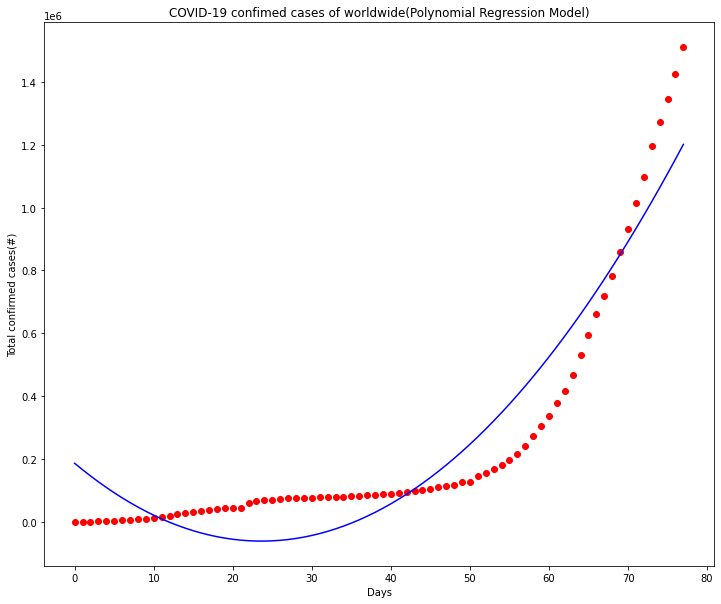

In [ ]:
# Graphical summary of the model.
plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train[0], lin_reg.predict(poly_reg.fit_transform(x_days_train)), color='blue')
plt.title("COVID-19 confimed cases of worldwide(Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases')
plt.show()

In [ ]:
# Polynomal linear Regression (degree=10)
poly_reg = PolynomialFeatures(degree=3)
# Model training with the train data.
x_poly = poly_reg.fit_transform(x_days_train)
# Applying linear regression.
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)

LinearRegression()

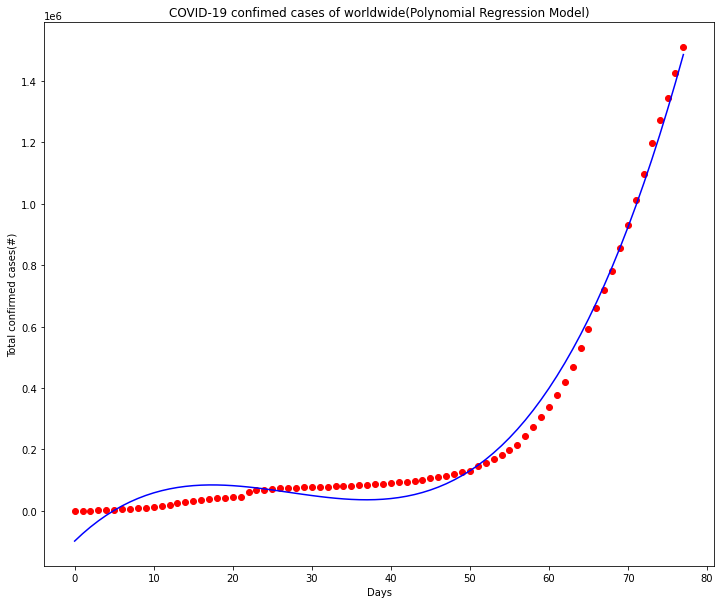

In [ ]:
# Graphical summary of the model.
plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train[0], lin_reg.predict(poly_reg.fit_transform(x_days_train)), color='blue')
plt.title("COVID-19 confimed cases of worldwide(Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases')
plt.show()

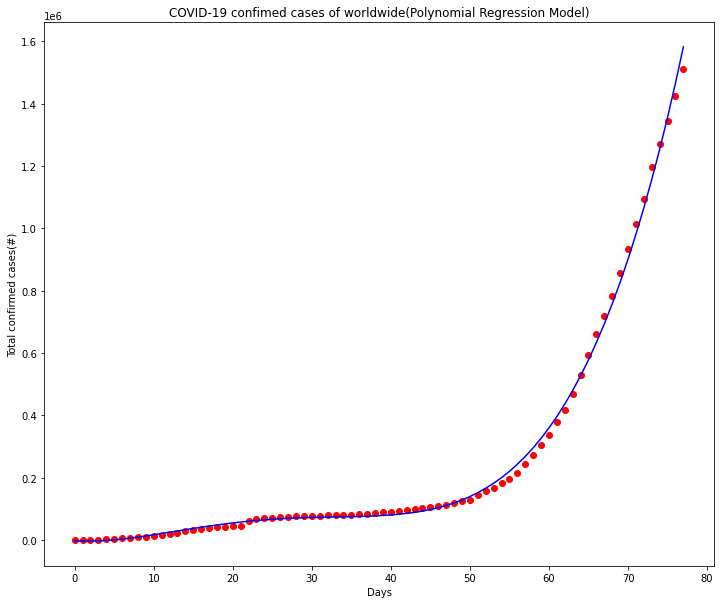

In [ ]:
# Polynomal linear Regression (degree=10)
poly_reg = PolynomialFeatures(degree=4)
# Model training with the train data.
x_poly = poly_reg.fit_transform(x_days_train)
# Applying linear regression.
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)
# Graphical summary of the model.
plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train[0], lin_reg.predict(poly_reg.fit_transform(x_days_train)), color='blue')
plt.title("COVID-19 confimed cases of worldwide(Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases')
plt.show()

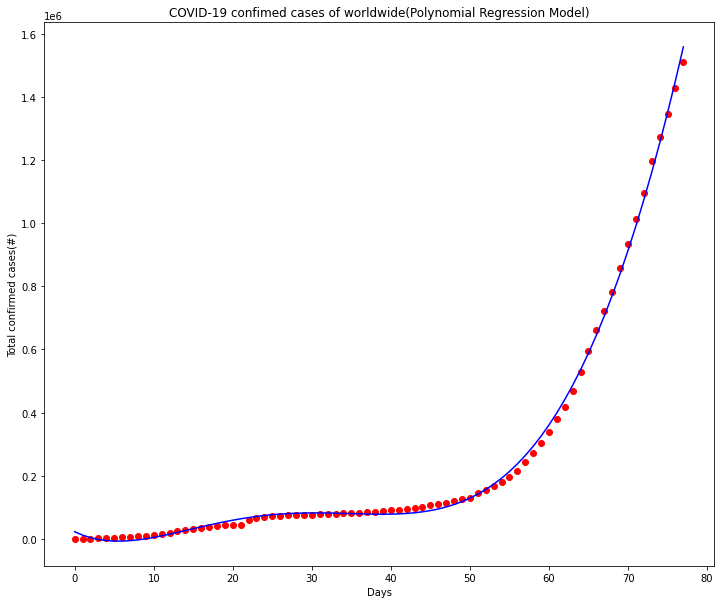

In [ ]:
# Polynomal linear Regression (degree=10)
poly_reg = PolynomialFeatures(degree=5)
# Model training with the train data.
x_poly = poly_reg.fit_transform(x_days_train)
# Applying linear regression.
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)
# Graphical summary of the model.
plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train[0], lin_reg.predict(poly_reg.fit_transform(x_days_train)), color='blue')
plt.title("COVID-19 confimed cases of worldwide(Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases')
plt.show()

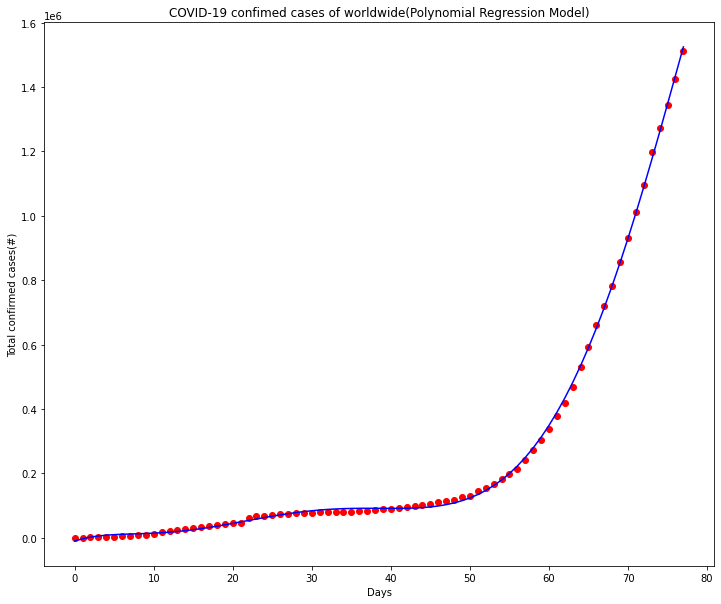

In [ ]:
# Polynomal linear Regression (degree=10)
poly_reg = PolynomialFeatures(degree=6)
# Model training with the train data.
x_poly = poly_reg.fit_transform(x_days_train)
# Applying linear regression.
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)
# Graphical summary of the model.
plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train[0], lin_reg.predict(poly_reg.fit_transform(x_days_train)), color='blue')
plt.title("COVID-19 confimed cases of worldwide(Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases')
plt.show()

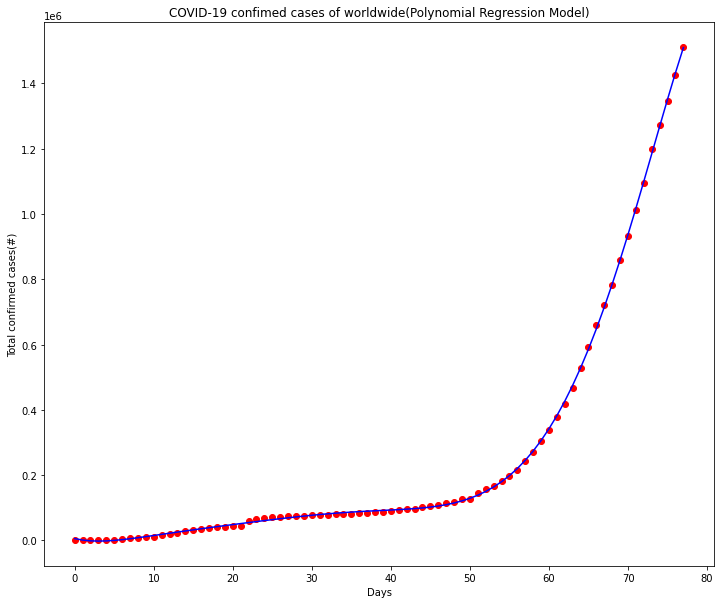

In [ ]:
# Polynomal linear Regression (degree=10)
poly_reg = PolynomialFeatures(degree=7)
# Model training with the train data.
x_poly = poly_reg.fit_transform(x_days_train)
# Applying linear regression.
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)
# Graphical summary of the model.
plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train[0], lin_reg.predict(poly_reg.fit_transform(x_days_train)), color='blue')
plt.title("COVID-19 confimed cases of worldwide(Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases')
plt.show()

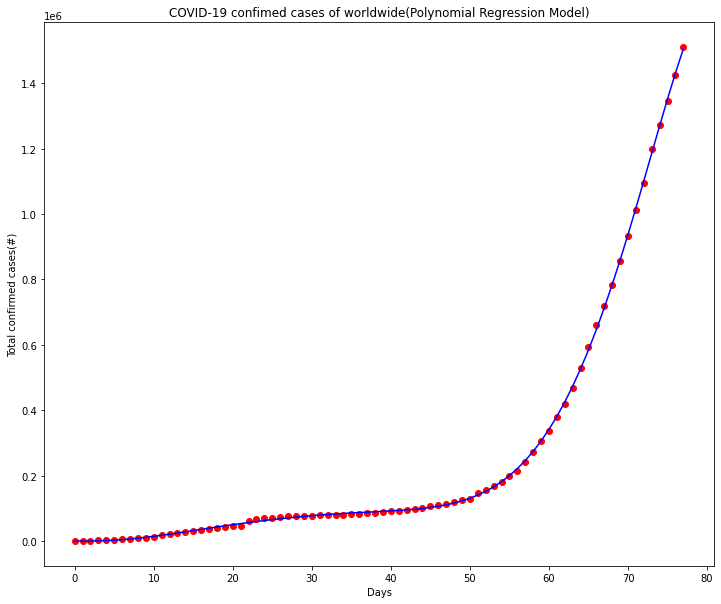

In [ ]:
# Polynomal linear Regression (degree=10)
poly_reg = PolynomialFeatures(degree=9)
# Model training with the train data.
x_poly = poly_reg.fit_transform(x_days_train)
# Applying linear regression.
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)
# Graphical summary of the model.
plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train[0], lin_reg.predict(poly_reg.fit_transform(x_days_train)), color='blue')
plt.title("COVID-19 confimed cases of worldwide(Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases')
plt.show()

In [ ]:
# Polynomal linear Regression (degree=10)
poly_reg = PolynomialFeatures(degree=10)
# Model training with the train data.
x_poly = poly_reg.fit_transform(x_days_train)
# Applying linear regression.
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)

LinearRegression()

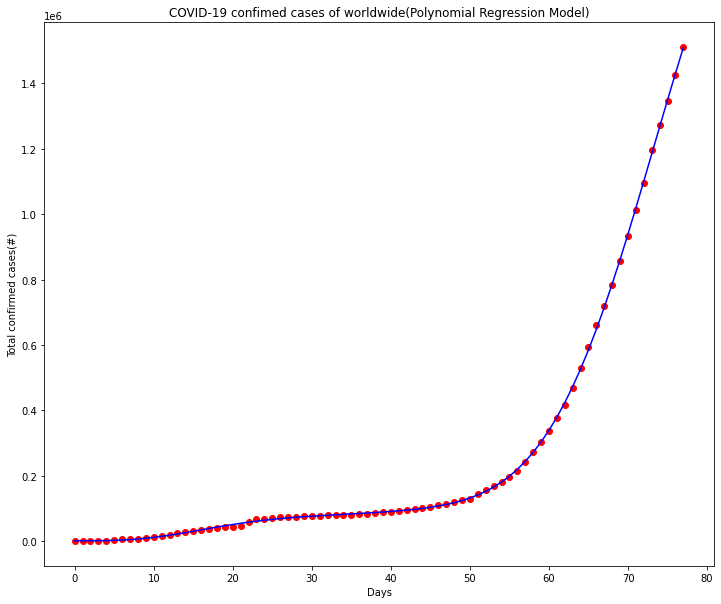

In [ ]:
# Graphical summary of the model.
plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train[0], lin_reg.predict(poly_reg.fit_transform(x_days_train)), color='blue')
plt.title("COVID-19 confimed cases of worldwide(Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases')
plt.show()



In [ ]:
# It seems that the polynomial line connects all the dots.
# Now, let's validate the model with the x_days_validate which contains index. For the index, the model
# will predict the confirmed cases of the data.
y_pred = lin_reg.predict(poly_reg.fit_transform(x_days_validate))
result = pd.DataFrame(y_pred)
result['Real Value'] = y_confirmed_validate.iloc[:, :].values
result['Predicted Value'] = pd.DataFrame(y_pred)
result = result[['Real Value', 'Predicted Value']]
print(result)

   Real Value  Predicted Value
0   1595350.0     1.586622e+06
1   1691719.0     1.662186e+06
2   1771514.0     1.736674e+06
3   1846680.0     1.811466e+06


In [ ]:
# Now, as per the model,let's check the accuracy of the model on validate data set.
print('Polynomial Regession  R2 Score   : ', r2_score(y_confirmed_validate, y_pred))
rmse = np.sqrt(mean_squared_error(y_confirmed_validate, y_pred))
print('RMSE of polynomial regression is :', rmse)

Polynomial Regession  R2 Score   :  0.9024569832922948
RMSE of polynomial regression is : 29164.36880060237


We can see that 90% varience is covered by polynomial regression.

In [ ]:
# However, let's apply the accurate model for test data.
y_confirmed_test_pred = lin_reg.predict(poly_reg.fit_transform(x_days_test))
predicted_result = pd.DataFrame(y_confirmed_test_pred) 
predicted_result['Real Test Value'] = y_confirmed_test.iloc[:, :].values
predicted_result['Predicted Test Value'] = pd.DataFrame(y_confirmed_test_pred)
predicted_result = predicted_result[['Real Test Value', 'Predicted Test Value']]
print(predicted_result)

   Real Test Value  Predicted Test Value
0        1917320.0          1.888829e+06
1        1976192.0          1.972149e+06
